In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('./diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
data.duplicated().sum()

3854

In [7]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [10]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

<Axes: xlabel='gender'>

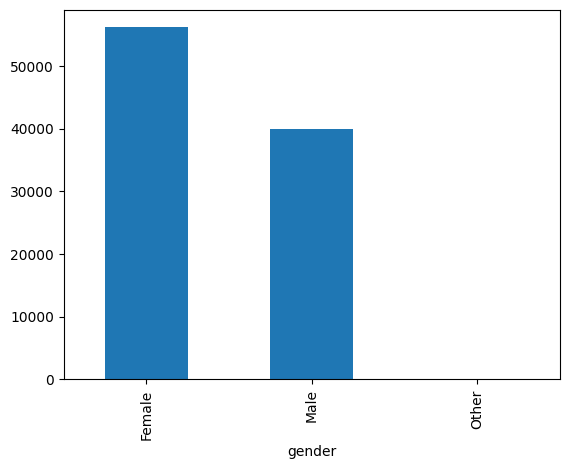

In [13]:
data['gender'].value_counts().plot.bar()

<Axes: xlabel='gender'>

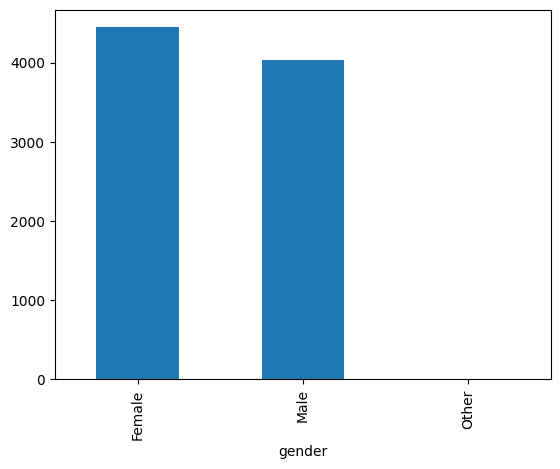

In [19]:
data.groupby(['gender'])['diabetes'].sum().plot.bar()

In [24]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [33]:
data.drop(data[data['gender']=='Other'].index,inplace=True)

In [34]:
data['gender'].value_counts()

gender
Female    56161
Male      39967
Name: count, dtype: int64

In [37]:
data['gender']=np.where(data['gender']=='Female',0,1)

In [41]:
data['smoking_history'].value_counts()

smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['smoking_history']=encoder.fit_transform(data['smoking_history'])

In [47]:
data['smoking_history']

0        4
1        0
2        4
3        1
4        1
        ..
99994    0
99996    0
99997    3
99998    4
99999    1
Name: smoking_history, Length: 96128, dtype: int32

In [51]:
X=data.drop(['diabetes'],axis=1)
y=data.diabetes

In [54]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.25,random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

--------------K-NearestNeighbors----------------
 
 Accuracy Score : 95.96787616511318 %

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21903
           1       0.97      0.57      0.71      2129

    accuracy                           0.96     24032
   macro avg       0.96      0.78      0.85     24032
weighted avg       0.96      0.96      0.95     24032



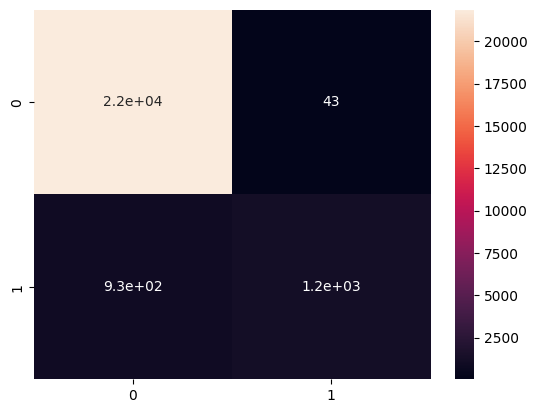

--------------DecisionTree----------------
 
 Accuracy Score : 94.89014647137151 %

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21903
           1       0.71      0.73      0.72      2129

    accuracy                           0.95     24032
   macro avg       0.84      0.85      0.84     24032
weighted avg       0.95      0.95      0.95     24032



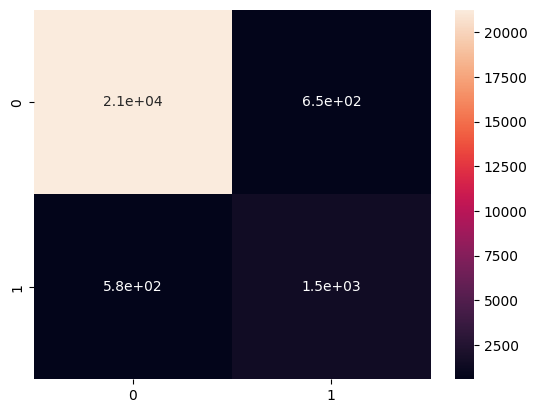

--------------RandomForest----------------
 
 Accuracy Score : 96.75432756324899 %

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21903
           1       0.93      0.68      0.79      2129

    accuracy                           0.97     24032
   macro avg       0.95      0.84      0.89     24032
weighted avg       0.97      0.97      0.97     24032



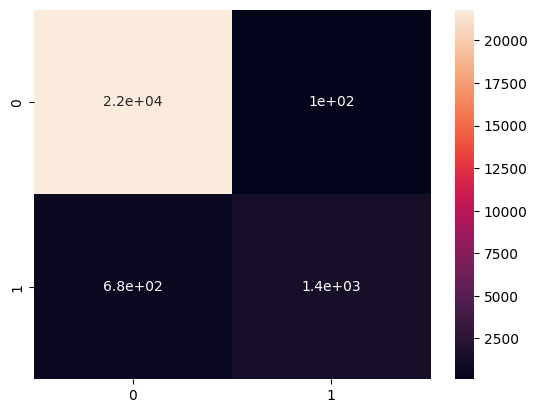

C:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--------------AdaBoost----------------
 
 Accuracy Score : 96.97070572569906 %

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21903
           1       0.98      0.67      0.80      2129

    accuracy                           0.97     24032
   macro avg       0.98      0.83      0.89     24032
weighted avg       0.97      0.97      0.97     24032



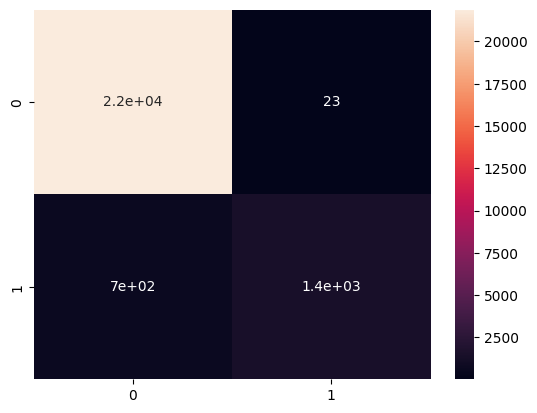

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

modelclasses=[
    ["K-NearestNeighbors",KNeighborsClassifier(n_neighbors=25)],
    ["DecisionTree",DecisionTreeClassifier()],
    ["RandomForest",RandomForestClassifier(n_estimators=10)],
    ["AdaBoost",AdaBoostClassifier(n_estimators=10)],
]
AccuracyScores=[]
# PrecisonScores=[]

for modelname,Model in modelclasses:        
        model=Model
        model.fit(Xtrain,Ytrain)
        ypred=model.predict(Xtest)
        AccuracyScores.append((modelname,accuracy_score(Ytest,ypred)*100))
        # PrecisonScores.append((modelname,precision_score(ytest,ypred)*100))

        print(f"--------------{modelname}----------------\n \n Accuracy Score : {accuracy_score(Ytest,ypred)*100} %")
        print(f"\n{classification_report(Ytest,ypred)}")
        sns.heatmap(confusion_matrix(Ytest,ypred),annot=True)
        plt.show()


In [76]:
pd.DataFrame(AccuracyScores,columns=['Model','Score'])

,Model,Score
0,K-NearestNeighbors,95.967876
1,DecisionTree,94.890146
2,RandomForest,96.754328
3,AdaBoost,96.970706
